 O Brasil é, segundo o site Brasil escola, um dos 10 maiores produtores mundiais de petróleo, e suas reservas provadas totalizam atualmente 11,89 bilhões de barris de petróleo.
 Além disso, o petróleo é o segundo maior produto de exportação do Brasil, perdendo apenas para a soja.

 Entretanto, uma dúvida surgi, já que somos um dos maiores produtores de petróleo do mundo, porque os preços médios dos seus derivados estão caros no país.

 Dessa forma, vou analisar durante o último relatório do resumo semanal IPC, pesquisa feita entre 30/03/2025 até 05/04/2025 pela Agência nacional de Petróleo(ANP), encontrado no site oficial do Governo para entender quais regiões estão com os maiores preços de revenda e inferir as possíveis causas no aumento dos preços e, por fim, apresentar possíveis soluções.


 


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
dados_gerais = pd.read_excel("resumo_semanal_lpc_2025-03-30_2025-04-05.xlsx")
dados_gerais

,"AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,SUPERINTENDÊNCIA DE DEFESA DA CONCORRÊNCIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LEVANTAMENTO DE PREÇOS DE COMBUSTÍVEIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,INTERVALO DE TEMPO: SEMANAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
156,2025-03-30 00:00:00,2025-04-05 00:00:00,BAHIA,SALVADOR,OLEO DIESEL S10,14,R$/l,6.51,0.169545,6.29,6.79,0.026
157,2025-03-30 00:00:00,2025-04-05 00:00:00,MARANHAO,SAO LUIS,OLEO DIESEL S10,19,R$/l,6.06,0.205542,5.8,6.55,0.034
158,2025-03-30 00:00:00,2025-04-05 00:00:00,SAO PAULO,SAO PAULO,OLEO DIESEL S10,122,R$/l,6.48,0.574459,5.79,8.99,0.089
159,2025-03-30 00:00:00,2025-04-05 00:00:00,PIAUI,TERESINA,OLEO DIESEL S10,13,R$/l,6.38,0.223713,6.09,6.79,0.035


In [ ]:
dados_gerais = dados_gerais.drop([0,1,2,3,4,5,6,7,8], axis= 0)

dados_gerais = dados_gerais.drop(range(9), axis=0).rename(columns={
    "AGÊNCIA NACIONAL DO PETRÓLEO, GÁS NATURAL E BIOCOMBUSTÍVEIS - ANP": "Data Inicial",
    "Unnamed: 1": "Data Final",
    "Unnamed: 2": "Estados",
    "Unnamed: 3": "Município",
    "Unnamed: 4": "Produto",
    "Unnamed: 5": "Número de Postos Pesquisados",
    "Unnamed: 6": "Unidade de medida",
    "Unnamed: 7": "Preço médio revenda",
    "Unnamed: 8": "Desvio padrão revenda",
    "Unnamed: 9": "Preço mínimo revenda",
    "Unnamed: 10": "Preço máximo revenda",
    "Unnamed: 11": "COEF de variação revenda"
})

dados_gerais

,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
9,2025-03-30 00:00:00,2025-04-05 00:00:00,SERGIPE,ARACAJU,ETANOL HIDRATADO,12,R$/l,4.86,0.071031,4.8,4.99,0.015
10,2025-03-30 00:00:00,2025-04-05 00:00:00,PARA,BELEM,ETANOL HIDRATADO,8,R$/l,4.74,0.181973,4.5,4.99,0.038
11,2025-03-30 00:00:00,2025-04-05 00:00:00,RORAIMA,BOA VISTA,ETANOL HIDRATADO,6,R$/l,5.15,0.020412,5.15,5.2,0.004
12,2025-03-30 00:00:00,2025-04-05 00:00:00,DISTRITO FEDERAL,BRASILIA,ETANOL HIDRATADO,27,R$/l,4.7,0.084547,4.48,4.79,0.018
13,2025-03-30 00:00:00,2025-04-05 00:00:00,MATO GROSSO DO SUL,CAMPO GRANDE,ETANOL HIDRATADO,15,R$/l,3.97,0.147041,3.76,4.38,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...
156,2025-03-30 00:00:00,2025-04-05 00:00:00,BAHIA,SALVADOR,OLEO DIESEL S10,14,R$/l,6.51,0.169545,6.29,6.79,0.026
157,2025-03-30 00:00:00,2025-04-05 00:00:00,MARANHAO,SAO LUIS,OLEO DIESEL S10,19,R$/l,6.06,0.205542,5.8,6.55,0.034
158,2025-03-30 00:00:00,2025-04-05 00:00:00,SAO PAULO,SAO PAULO,OLEO DIESEL S10,122,R$/l,6.48,0.574459,5.79,8.99,0.089
159,2025-03-30 00:00:00,2025-04-05 00:00:00,PIAUI,TERESINA,OLEO DIESEL S10,13,R$/l,6.38,0.223713,6.09,6.79,0.035


Segundo o BEN 2024, os combustíveis mais consumidos ainda no setor de transportes são óleo diesel (43,4%), gasolina (27,8%), etanol 0 (17,3%) e o biodiesel (5,2%).

Vamos tratar apenas os mais consumidos: Gasolina comun e aditivada, etanol hidratado e óleo diesel.

In [32]:
combustiveis = ['GASOLINA COMUM','GASOLINA ADITIVADA','ETANOL HIDRATADO','OLEO DIESEL S10']
dados_filtrado = dados_gerais[dados_gerais['Produto'].isin(combustiveis)]
dados_filtrado

,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
9,2025-03-30 00:00:00,2025-04-05 00:00:00,SERGIPE,ARACAJU,ETANOL HIDRATADO,12,R$/l,4.86,0.071031,4.8,4.99,0.015
10,2025-03-30 00:00:00,2025-04-05 00:00:00,PARA,BELEM,ETANOL HIDRATADO,8,R$/l,4.74,0.181973,4.5,4.99,0.038
11,2025-03-30 00:00:00,2025-04-05 00:00:00,RORAIMA,BOA VISTA,ETANOL HIDRATADO,6,R$/l,5.15,0.020412,5.15,5.2,0.004
12,2025-03-30 00:00:00,2025-04-05 00:00:00,DISTRITO FEDERAL,BRASILIA,ETANOL HIDRATADO,27,R$/l,4.7,0.084547,4.48,4.79,0.018
13,2025-03-30 00:00:00,2025-04-05 00:00:00,MATO GROSSO DO SUL,CAMPO GRANDE,ETANOL HIDRATADO,15,R$/l,3.97,0.147041,3.76,4.38,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...
156,2025-03-30 00:00:00,2025-04-05 00:00:00,BAHIA,SALVADOR,OLEO DIESEL S10,14,R$/l,6.51,0.169545,6.29,6.79,0.026
157,2025-03-30 00:00:00,2025-04-05 00:00:00,MARANHAO,SAO LUIS,OLEO DIESEL S10,19,R$/l,6.06,0.205542,5.8,6.55,0.034
158,2025-03-30 00:00:00,2025-04-05 00:00:00,SAO PAULO,SAO PAULO,OLEO DIESEL S10,122,R$/l,6.48,0.574459,5.79,8.99,0.089
159,2025-03-30 00:00:00,2025-04-05 00:00:00,PIAUI,TERESINA,OLEO DIESEL S10,13,R$/l,6.38,0.223713,6.09,6.79,0.035


In [33]:
preco_maximo = dados_filtrado.groupby('Produto')['Preço máximo revenda'].max().reset_index()

preco_maximo = preco_maximo.sort_values("Preço máximo revenda", ascending= False)

preco_maximo

,Produto,Preço máximo revenda
1,GASOLINA ADITIVADA,8.99
3,OLEO DIESEL S10,8.99
2,GASOLINA COMUM,8.79
0,ETANOL HIDRATADO,5.99


In [34]:
gasolina_comun = dados_filtrado[dados_filtrado["Produto"] == "GASOLINA COMUM"]

gasolina_adtivada = dados_filtrado[dados_filtrado["Produto"] == "GASOLINA ADITIVADA"]

etanol = dados_filtrado[dados_filtrado["Produto"] == "ETANOL HIDRATADO"]

oleo_disel = dados_filtrado[dados_filtrado["Produto"] == "OLEO DIESEL S10"]



In [35]:
display(gasolina_comun[gasolina_comun["Preço médio revenda"] == np.max(gasolina_comun["Preço médio revenda"])])
print("Maior preço registrado da gasolina comum\n")


display(gasolina_adtivada[gasolina_adtivada["Preço médio revenda"] == np.max(gasolina_adtivada["Preço médio revenda"])])
print("Maior preço registrado da gasolina aditivada\n")

display(etanol[etanol["Preço médio revenda"] == np.max(etanol["Preço médio revenda"])])
print("Maior preço registrado de Etanol Hidratado\n")

display(oleo_disel[oleo_disel["Preço médio revenda"] == np.max(oleo_disel["Preço médio revenda"])])
print("Maior preço registrado de óleo diesel")

,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
74,2025-03-30 00:00:00,2025-04-05 00:00:00,ACRE,RIO BRANCO,GASOLINA COMUM,6,R$/l,7.63,0.017889,7.6,7.65,0.002


Maior preço registrado da gasolina comum



,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
50,2025-03-30 00:00:00,2025-04-05 00:00:00,ACRE,RIO BRANCO,GASOLINA ADITIVADA,5,R$/l,7.67,0.037683,7.64,7.73,0.005


Maior preço registrado da gasolina aditivada



,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
21,2025-03-30 00:00:00,2025-04-05 00:00:00,AMAZONAS,MANAUS,ETANOL HIDRATADO,31,R$/l,5.48,0.004995,5.47,5.49,0.001
24,2025-03-30 00:00:00,2025-04-05 00:00:00,RONDONIA,PORTO VELHO,ETANOL HIDRATADO,7,R$/l,5.48,0.015275,5.45,5.49,0.003


Maior preço registrado de Etanol Hidratado



,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
154,2025-03-30 00:00:00,2025-04-05 00:00:00,ACRE,RIO BRANCO,OLEO DIESEL S10,4,R$/l,7.81,0.03304,7.78,7.85,0.004


Maior preço registrado de óleo diesel


Concluções dos maiores Preços médios:

Estado com o maior preço médio de revenda da Gasolina, comum e aditivada, foi o Acre:

Gasolina comum: R$ 7,63

Gasolina Aditivada: R$ 7,67

Estados com o maior preço médio de revendas do Etanol foi Amazonas e Rondonia:

Etanol Amazonas e Rondonia: R$ 5,48

Estado com o maior preço médio de revendas do Óleo Diesel foi o  Acre:

Óleo Diesel no Acre: R$ 7,81



In [36]:
display(gasolina_comun[gasolina_comun["Preço médio revenda"] == np.min(gasolina_comun["Preço médio revenda"])])
print("Maior preço registrado da gasolina comum\n")


display(gasolina_adtivada[gasolina_adtivada["Preço médio revenda"] == np.min(gasolina_adtivada["Preço médio revenda"])])
print("Maior preço registrado da gasolina aditivada\n")

display(etanol[etanol["Preço médio revenda"] == np.min(etanol["Preço médio revenda"])])
print("Maior preço registrado de Etanol Hidratado\n")

display(oleo_disel[oleo_disel["Preço médio revenda"] == np.min(oleo_disel["Preço médio revenda"])])
print("Maior preço registrado de óleo diesel")

,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
77,2025-03-30 00:00:00,2025-04-05 00:00:00,MARANHAO,SAO LUIS,GASOLINA COMUM,21,R$/l,5.77,0.11629,5.65,6.15,0.02


Maior preço registrado da gasolina comum



,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
53,2025-03-30 00:00:00,2025-04-05 00:00:00,MARANHAO,SAO LUIS,GASOLINA ADITIVADA,12,R$/l,5.91,0.195371,5.68,6.41,0.033


Maior preço registrado da gasolina aditivada



,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
14,2025-03-30 00:00:00,2025-04-05 00:00:00,MATO GROSSO,CUIABA,ETANOL HIDRATADO,19,R$/l,3.84,0.071884,3.75,3.99,0.019


Maior preço registrado de Etanol Hidratado



,Data Inicial,Data Final,Estados,Município,Produto,Número de Postos Pesquisados,Unidade de medida,Preço médio revenda,Desvio padrão revenda,Preço mínimo revenda,Preço máximo revenda,COEF de cariação revenda
153,2025-03-30 00:00:00,2025-04-05 00:00:00,PERNAMBUCO,RECIFE,OLEO DIESEL S10,12,R$/l,5.99,0.065134,5.93,6.19,0.011


Maior preço registrado de óleo diesel


Conclusões dos menores preços médios:

O estado com menor preço médio de revenda da Gasolina Comum e aditivada foi o Maranhão:

Gasolina comum no Maranhão: R$ 5,77

Gasolina Aditivada no Maranhão: R$ 5,91

O Estado com o menor preço médio de revenda do Etanol hidratado foi em Mato Grosso 

Etanol Hidratado no Mato Grosso: R$ 3,84

O Estado com o menor preço de óleo disel foi Pernambuco:

óleo Disel em Pernambuco: R$ 5,99

In [37]:
mato_grosso = dados_filtrado[dados_filtrado["Estados"] == "MATO GROSSO"]
mato_grosso_sul = dados_filtrado[dados_filtrado["Estados"] == "MATO GROSSO DO SUL"]
df = dados_filtrado[dados_filtrado["Estados"] == "DISTRITO FEDERAL"]

centro_oeste = pd.concat([mato_grosso,mato_grosso_sul,df])

maranhao = dados_filtrado[dados_filtrado["Estados"] == "MARANHAO"]
pernambuco = dados_filtrado[dados_filtrado["Estados"] == "PERNAMBUCO"]
piaui = dados_filtrado[dados_filtrado["Estados"] == "PIAUI"]
bahia = dados_filtrado[dados_filtrado["Estados"] == "BAHIA"]
alagoas = dados_filtrado[dados_filtrado["Estados"] == "ALAGOAS"]
sergipe = dados_filtrado[dados_filtrado["Estados"] == "SERGIPE"]
paraiba = dados_filtrado[dados_filtrado["Estados"] == "PARAIBA"]
rn = dados_filtrado[dados_filtrado["Estados"] == "RIO GRANDE DO NORTE"]
ceara = dados_filtrado[dados_filtrado["Estados"] == "CEARA"]

nordeste = pd.concat([maranhao,pernambuco,piaui,bahia,alagoas,sergipe,paraiba,rn,ceara])

sp = dados_filtrado[dados_filtrado["Estados"] == "SAO PAULO"]
rj = dados_filtrado[dados_filtrado["Estados"] == "RIO DE JANEIRO"]
es = dados_filtrado[dados_filtrado["Estados"] == "ESPIRITO SANTO"]

sudeste = pd.concat([sp,rj,es])

para = dados_filtrado[dados_filtrado["Estados"] == "PARA"]
acre = dados_filtrado[dados_filtrado["Estados"] == "ACRE"]
amazonas = dados_filtrado[dados_filtrado["Estados"] == "AMAZONAS"]
tocantis =dados_filtrado[dados_filtrado["Estados"] == "TOCANTINS"]
amapa = dados_filtrado[dados_filtrado["Estados"] == "AMAPA"]
rondonia = dados_filtrado[dados_filtrado["Estados"] == "RONDONIA"]
roraima = dados_filtrado[dados_filtrado["Estados"] == "RORAIMA"]

norte = pd.concat([para,acre,amazonas,tocantis,amapa,rondonia,roraima])

parana = dados_filtrado[dados_filtrado["Estados"] == "PARANA"]
sc = dados_filtrado[dados_filtrado['Estados'] == "SANTA CATARINA"]
rs = dados_filtrado[dados_filtrado["Estados"] == "RIO GRANDE DO SUL"]

sul = pd.concat([parana,sc,rs])



Comparando os preços da gasolina comum por regiões

In [38]:
nordeste_gasolina_comum = nordeste[nordeste["Produto"] == "GASOLINA COMUM"]
media_nordeste_gasolina_comum = round(np.mean(nordeste_gasolina_comum["Preço médio revenda"]),2)

nordeste_gasolina_aditivada = nordeste[nordeste["Produto"] == "GASOLINA ADITIVADA"]
media_nordeste_gasolina_aditivada = round(np.mean(nordeste_gasolina_comum["Preço médio revenda"]),2)

nordeste_etanol = nordeste[nordeste["Produto"] == "ETANOL HIDRATADO"]
media_nordeste_etanol = round(np.mean(nordeste_etanol["Preço médio revenda"]),2)

diesel_nordeste = nordeste[nordeste["Produto"] == "OLEO DIESEL S10"]
media_nordeste_diesel = round(np.mean(diesel_nordeste["Preço médio revenda"]),2)


print(f"Preço médio dos combutíveis no nordeste:\n Gasolina Comum: R$ {media_nordeste_gasolina_comum} \n Gasolina Aditivada: R$ {media_nordeste_gasolina_aditivada} \n Etanol: R$ {media_nordeste_etanol}\n Óleo Diesel: R$ {media_nordeste_diesel}\n")

centro_gasolina_comum = centro_oeste[centro_oeste["Produto"] == "GASOLINA COMUM"]
media_centro_gasolina_comum = round(np.mean(centro_gasolina_comum["Preço médio revenda"]),2)

centro_gasolina_aditivada = centro_oeste[centro_oeste["Produto"] == "GASOLINA ADITIVADA"]
media_centro_gasolina_aditivada = round(np.mean(centro_gasolina_aditivada["Preço médio revenda"]),2)

centro_etanol = centro_oeste[centro_oeste["Produto"] == "ETANOL HIDRATADO"]
media_centro_etanol = round(np.mean(centro_etanol["Preço médio revenda"]),2) 

centro_diesel = centro_oeste[centro_oeste["Produto"] == "OLEO DIESEL S10"]
media_centro_diesel = round(np.mean(centro_diesel["Preço médio revenda"]),2)

print(f"Preço médio dos combustíveis no centro-oeste: \n Gasolina Comum: R$ {media_centro_gasolina_comum}\n Gasolina Aditivada: R$ {media_centro_gasolina_aditivada}\n Etanol: R$ {media_centro_etanol}\n Óleo Diesel: R$ {media_centro_diesel}\n")


sudeste_gasolina_comum = sudeste[sudeste["Produto"] == "GASOLINA COMUM"]
media_sudeste_gasolina_comum = round(np.mean(sudeste_gasolina_comum["Preço médio revenda"]),2)

sudeste_gasolina_aditivada = sudeste[sudeste["Produto"] == "GASOLINA ADITIVADA"]
media_sudeste_gasolina_aditivada = round(np.mean(sudeste_gasolina_aditivada["Preço médio revenda"]),2)

sudeste_etanol = sudeste[sudeste["Produto"] == "ETANOL HIDRATADO"]
media_sudeste_etanol = round(np.mean(sudeste_etanol["Preço médio revenda"]),2) 

sudeste_diesel = sudeste[sudeste["Produto"] == "OLEO DIESEL S10"]
media_sudeste_diesel = round(np.mean(sudeste_diesel["Preço médio revenda"]),2)

print(f"Preço médio dos combustíveis no Sudeste: \n Gasolina Comum: R$ {media_sudeste_gasolina_comum} \n Gasolina Aditivada: R$ {media_sudeste_gasolina_aditivada} \n Etanol: R$ {media_sudeste_etanol} \n óleo Diesel: R$ {media_sudeste_diesel}\n")

sul_gasolina_comum = sul[sul["Produto"] == "GASOLINA COMUM"]
media_sul_gasolina_comum = round(np.mean(sul_gasolina_comum["Preço médio revenda"]),2)

sul_gasolina_aditivada = sul[sul["Produto"] == "GASOLINA ADITIVADA"]
media_sul_gasolina_aditivada = round(np.mean(sul_gasolina_aditivada["Preço médio revenda"]),2)

sul_etanol = sul[sul["Produto"] == "ETANOL HIDRATADO"]
media_sul_etanol = round(np.mean(sul_etanol["Preço médio revenda"]),2) 

sul_diesel = sul[sul["Produto"] == "OLEO DIESEL S10"]
media_sul_diesel = round(np.mean(sul_diesel["Preço médio revenda"]),2)

print(f"Preço médio dos combustíveis no Sul: \n Gasolina Comum: R$ {media_sul_gasolina_comum} \n Gasolina Aditivada: R$ {media_sul_gasolina_aditivada} \n Etanol: R$ {media_sul_etanol} \n óleo Diesel: R$ {media_sul_diesel}\n")

norte_gasolina_comum = norte[norte["Produto"] == "GASOLINA COMUM"]
media_norte_gasolina_comum = round(np.mean(norte_gasolina_comum["Preço médio revenda"]),2)

norte_gasolina_aditivada = norte[norte["Produto"] == "GASOLINA ADITIVADA"]
media_norte_gasolina_aditivada = round(np.mean(norte_gasolina_aditivada["Preço médio revenda"]),2)

norte_etanol = norte[norte["Produto"] == "ETANOL HIDRATADO"]
media_norte_etanol = round(np.mean(norte_etanol["Preço médio revenda"]),2) 

norte_diesel = norte[norte["Produto"] == "OLEO DIESEL S10"]
media_norte_diesel = round(np.mean(norte_diesel["Preço médio revenda"]),2)

print(f"Preço médio dos combustíveis no Norte:\n Gasolina Comum: R$ {media_norte_gasolina_comum} \n Gasolina Aditivada: R$ {media_norte_gasolina_aditivada} \n Etanol: R$ {media_norte_etanol} \n óleo Diesel: R$ {media_norte_diesel}")


Preço médio dos combutíveis no nordeste:
 Gasolina Comum: R$ 6.2 
 Gasolina Aditivada: R$ 6.2 
 Etanol: R$ 4.79
 Óleo Diesel: R$ 6.28

Preço médio dos combustíveis no centro-oeste: 
 Gasolina Comum: R$ 6.15
 Gasolina Aditivada: R$ 6.32
 Etanol: R$ 4.17
 Óleo Diesel: R$ 6.39

Preço médio dos combustíveis no Sudeste: 
 Gasolina Comum: R$ 6.22 
 Gasolina Aditivada: R$ 6.49 
 Etanol: R$ 4.46 
 óleo Diesel: R$ 6.43

Preço médio dos combustíveis no Sul: 
 Gasolina Comum: R$ 6.85 
 Gasolina Aditivada: R$ 7.01 
 Etanol: R$ 4.97 
 óleo Diesel: R$ 6.6

Preço médio dos combustíveis no Norte:
 Gasolina Comum: R$ 6.81 
 Gasolina Aditivada: R$ 6.97 
 Etanol: R$ 5.22 
 óleo Diesel: R$ 6.82


In [41]:
regiao_precos = {
    
      "Região": ["Sul","Norte","centro-oeste","nordeste","sudeste"],
      
      "Gasolina comum": [media_sul_gasolina_comum,media_norte_gasolina_comum,media_centro_gasolina_comum,media_nordeste_gasolina_comum,media_sudeste_gasolina_comum],
      
      "gasolina_adtivada" : [media_sul_gasolina_aditivada,media_norte_gasolina_aditivada,media_centro_gasolina_aditivada,media_nordeste_gasolina_aditivada,media_sudeste_gasolina_aditivada],
      
      "Etanol":[media_sul_etanol,media_norte_etanol,media_centro_etanol,media_nordeste_etanol,media_sudeste_etanol], 

      "Oleo Diesel" : [media_sul_diesel,media_norte_diesel,media_centro_diesel,media_nordeste_diesel,media_sudeste_diesel]
    
}

regiao_precos_df = pd.DataFrame(regiao_precos)
regiao_precos_df

,Região,Gasolina comum,gasolina_adtivada,Etanol,Oleo Diesel
0,Sul,6.85,7.01,4.97,6.60
1,Norte,6.81,6.97,5.22,6.82
2,centro-oeste,6.15,6.32,4.17,6.39
3,nordeste,6.20,6.20,4.79,6.28
4,sudeste,6.22,6.49,4.46,6.43


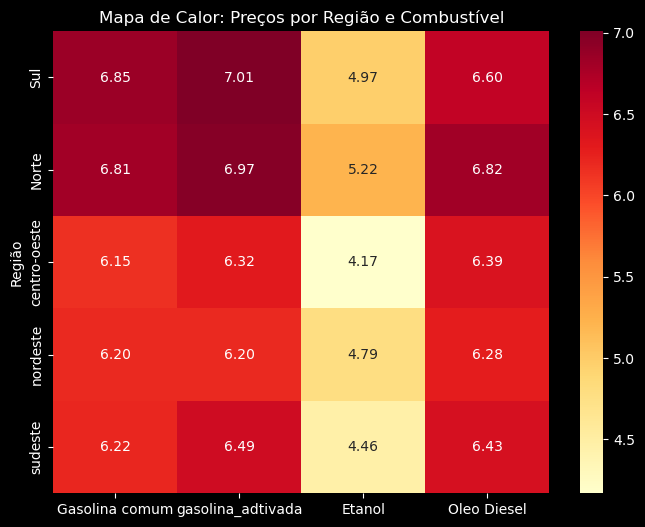

In [42]:
import seaborn as sns

# Preparar dados (exemplo)
regiao_precos_df = regiao_precos_df.set_index('Região')

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(regiao_precos_df, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title('Mapa de Calor: Preços por Região e Combustível')
plt.show()

Nesse levantamento feito entre 30/03/2025 e 05/04/2025 revela disprepância nos preços dos combustíveis de acordo com as regiões. Os que mais se destacam são o Sul, Norte e sudeste. Os fatores mais relevântes para os preços estarem altos nessas regiões são:

- ICMS(Imposto sobre circulação de mercadorias e serviços) é um imposto estadual e cada a cada estado definir a sua alíquota. Segundo o site SIMTAX, em uma pesquisa feita em Janeiro de 2025, a tabela de ICMS em cada estado seguiu a seguinte média:

-> Norte: 19,35%

-> Sudeste: 18,75% (Destaque para o Rio de Janeiro o maior produtor de petróleo e com a maior alíquota do país chegando a marca dos 22%)

-> Centro-oeste: 18,25%

-> Nordeste: 18% (Destaque para o Maranhão com a maior alíquota,juntamente com o Rio de janeiro, chegando a marca de 22%)

-> Sul: 17,83%


- No entanto, esse único fator não explica a alta nos preços em algumas regiões, já que a região com a menor alíquota é a com os maiores preços de combustíveis. No caso do Sul, um fator determinantes é a logística de transporte dos derivádos do Petróleo, uma vez que os maiores produtores são as bacias de Santos e Campos localizadas no Sudeste do país. Dessa forma, almejando um tranporte seguro, o abastecimento é feito através de rodovias e canais fluviais. Ademais, a malha rodoviária é a predominante no Brasil, ou seja, o trasporte depende das rodovívias, logo, o encarecimento dos produtos é justificado pelos altos preços no frete: combustíveis, manutenções,pedágios e altas distâncias.


- há desigualdade no acesso ao refino do pretóleo, etapa fundamental para transformar o pretóleo bruto em combustível, visto que o Rio de Janeiro por ser o maior produtor também tem refinarias de fácil acesso. Já no caso de regiões periféricas como é o caso do Sul, Norte e Nordeste, a importação é a solução para adquirir combustíveis.
Dessa forma, os estados das regiões sitadas são expostos a variação do dólar que, durante a pesquisa feita, ficou entre 5,60, na baixa, e  dos 5,77, na alta, durante o período 30/03/2025 e 05/04/2025.




In [ ]:
import pandas as pd
import requests

def get_dolar_bcb(data_inicio, data_fim):
    url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.10813/dados?formato=json&dataInicial={data_inicio}&dataFinal={data_fim}"
    response = requests.get(url)
    if response.status_code == 200:
        dados = response.json()
        df = pd.DataFrame(dados)
        df['data'] = pd.to_datetime(df['data'], dayfirst=True)
        df['valor'] = df['valor'].astype(float)
        return df.sort_values('data')
    else:
        raise Exception("Erro na API do BCB")


df_dolar = get_dolar_bcb("30/03/2025", "05/04/2025")
print(df_dolar.head())

        data   valor
0 2025-03-31  5.7416
1 2025-04-01  5.7045
2 2025-04-02  5.6918
3 2025-04-03  5.6062
4 2025-04-04  5.7771


Conclução da análise:

- A dispariedade dos preços dos combustíveis, no geral, está ligada aos fatores:

-> Impostos desiguais

-> logística

-> produção local

-> dinâmica do mercado(principalmente o aumento do preço médio do dólar, inflação e taxa de juros alta.)


- Soluções viáveis para minimizar esse óbice:

-> Melhorar o sistema de logística do país: país com território extenso, que é o caso do Brasil, deve optar pelo transporte ferroviário. Analogamente, a China, por exemplo, que é um país com um extenso território conta com um transporte ferroviário mais eficaz do que o Brasil que, por sua vez, conta com apenas 5% da sua distribuição dos tipos de modais logisticos. 

-> Criar um projeto de lei que crie uma alíquota de ICMS única e proporcional aos estados.

-> Investimentos em refinarias, principalmente, no Nordeste onde o número é menor. Dessa forma, as regiões não necessitariam de importação dos combustíveis e evitariam a exposição a variação do dólar

-> Claro as dinâmicas do mercado, ou seja, o Banco Central deve atuar mais forte para conter a níveis altos de inflação e da taxa de juros, já que a taxa de juros, por ser uma medida contracionista, diminui o crescimento da economia no geral.
